<a href="https://colab.research.google.com/github/DilshanBotheju/BankMarketingPredictionSystem/blob/main/ModelDevelopment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Load the data set with seperated columns
data_path = "/content/drive/MyDrive/CM2604_CW/bank-additional-full.csv"
bank_data = pd.read_csv(data_path, encoding = "latin-1", sep =";")
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# To get no. of columns and rows
bank_data.shape

(41188, 21)

In [ ]:
# Duplicate handling
duplicates = bank_data.duplicated().sum()
duplicates



12

In [ ]:
# Remove duplicate
bank_data = bank_data.drop_duplicates()

In [ ]:
# Rows after removing duplicates
bank_data.shape

(41176, 21)

In [ ]:
# Replace places with unknown to null in whole dataset
bank_data = bank_data.replace("unknown",pd.NA)

In [ ]:
# To calculate no. of null fields in each column
bank_data.isnull().sum()

,0
age,0
job,330
marital,80
education,1730
default,8596
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             40846 non-null  object 
 2   marital         41096 non-null  object 
 3   education       39446 non-null  object 
 4   default         32580 non-null  object 
 5   housing         40186 non-null  object 
 6   loan            40186 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [ ]:
# Getting category counts for y column
bank_data["y"].value_counts()

,count
y,
no,36537
yes,4639


In [ ]:
import sklearn
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encoding for "y" column
bank_data['y'] = label_encoder.fit_transform(bank_data['y'])

In [ ]:
# Convert columns to numerical columns
numeric_bank_data = bank_data.select_dtypes(include= "number")

In [ ]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,<NA>,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
# To identify correlation among y column and other numeric columns
correlation = numeric_bank_data.corr()["y"]
correlation

,y
age,0.030381
duration,0.405297
campaign,-0.066361
pdays,-0.324948
previous,0.230202
emp.var.rate,-0.298289
cons.price.idx,-0.136134
cons.conf.idx,0.054802
euribor3m,-0.307740
nr.employed,-0.354669


age column

In [ ]:
bank_data["age"].value_counts()

,count
age,
31,1947
32,1845
33,1833
36,1779
35,1758
...,...
89,2
91,2
94,1


In [ ]:
# Handling multiple age categories
def setAge(age):
    if age>=18 and age<=35:
        return "Young citizens"
    elif age>35 and age<=55:
        return "Middle Aged citizens"
    else:
        return "Senior citizens"

# Apply function to code
bank_data["age"] = bank_data["age"].apply(setAge)

In [ ]:
bank_data["age"].value_counts()

,count
age,
Middle Aged citizens,21086
Young citizens,16504
Senior citizens,3586


job column

In [ ]:
# To handle null values when encoding
def setJob(job):
    if pd.isna(job):  # Check for NaN values
        return "Null"
    elif job == "unemployed":
        return "unemployed"
    elif job == "student":
        return "student"
    elif job == "retired":
        return "retired"
    else:
        return "employed"

# Apply the function to the job column
bank_data["job"] = bank_data["job"].apply(setJob)

In [ ]:
bank_data["job"].value_counts()

,count
job,
employed,37239
retired,1718
unemployed,1014
student,875
Null,330


marital column

In [ ]:
# Handle null values when enoding
def setMarital(marital):
    if pd.isna(marital):
        return "Null"
    else:
        return marital

bank_data["marital"] = bank_data["marital"].apply(setMarital)

In [ ]:
bank_data["marital"].value_counts()

,count
marital,
married,24921
single,11564
divorced,4611
Null,80


month column

In [ ]:
bank_data["month"].value_counts()

,count
month,
may,13767
jul,7169
aug,6176
jun,5318
nov,4100
apr,2631
oct,717
sep,570
mar,546


education column

In [ ]:
# Making the available categories simple
def setEducation(education):
    if pd.isna(education):
        return "Null"
    elif education in ["basic.9y", "basic.6y", "basic.4y"]:
        return "basic"
    else:
        return education

# Applying the function
bank_data["education"] = bank_data["education"].apply(setEducation)

In [ ]:
bank_data["education"].value_counts()

,count
education,
basic,12512
university.degree,12164
high.school,9512
professional.course,5240
Null,1730
illiterate,18


In [ ]:
bank_data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,Senior citizens,employed,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,Senior citizens,employed,married,high.school,<NA>,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,Middle Aged citizens,employed,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,Middle Aged citizens,employed,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,Senior citizens,employed,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


default amount column

In [ ]:
# Handle null values in default column
def setDefault(default):
    if pd.isna(default):
        return "Null"
    else:
        return default

# Apply function to column
bank_data["default"] = bank_data["default"].apply(setDefault)

In [ ]:
bank_data["default"].value_counts()

,count
default,
no,32577
Null,8596
yes,3


housing loan column

In [ ]:
# Handle null values
def setHousing(housing):
    if pd.isna(housing):
        return "Null"
    else:
        return housing

bank_data["housing"] = bank_data["housing"].apply(setHousing)

In [ ]:
bank_data["housing"].value_counts()

,count
housing,
yes,21571
no,18615
Null,990


personal loan column

In [ ]:
# Handle null values
def setPersonal(personal):
    if pd.isna(personal):
        return "Null"
    else:
        return personal

bank_data["loan"] = bank_data["loan"].apply(setPersonal)

In [ ]:
bank_data["loan"].value_counts()

,count
loan,
no,33938
yes,6248
Null,990


contact column

In [ ]:
bank_data["contact"].value_counts()

,count
contact,
cellular,26135
telephone,15041


pdays column

In [ ]:
# Handling multiple numerical values
def setPdays(pdays):
    if pdays <=30:
      return "recently"
    elif pdays == 999:
      return "not contacted"
    else:
      return "long time ago"

# Applying the function
bank_data["pdays"] = bank_data["pdays"].apply(setPdays)

In [ ]:
bank_data["pdays"].value_counts()

,count
pdays,
not contacted,39661
recently,1515


In [ ]:
# To see the data types
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  object 
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  object 
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [ ]:
#Getting categorical columns
categorical_bank_data = bank_data.select_dtypes(include="object")

In [ ]:
# Label encoding categorical colums
for column in categorical_bank_data.columns:
    bank_data[column] = label_encoder.fit_transform(bank_data[column])

In [ ]:
# Display encoded dataset
bank_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,1,2,1,1,1,1,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,1,1,2,2,0,1,1,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,0,1,2,2,1,2,1,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,0,1,2,1,1,1,1,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,1,1,2,2,1,1,2,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,0,1,2,1,0,1,1,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,1,1,2,4,1,1,1,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,0,1,2,0,0,1,1,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,2,1,3,4,1,2,1,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,2,1,3,2,1,2,1,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
correlation = bank_data.corr()["y"]
correlation

,y
age,0.064286
job,0.090762
marital,0.044585
education,0.048877
default,0.099210
housing,0.011436
loan,-0.003151
contact,-0.144774
month,-0.006051
day_of_week,0.015970


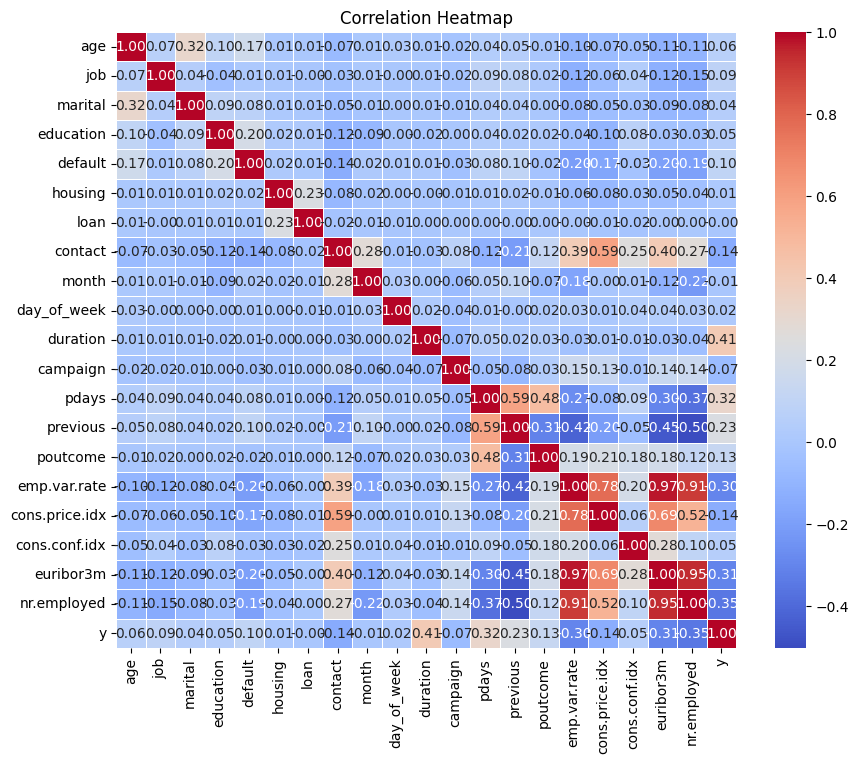

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix to find inter correlation
correlation_matrix = bank_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Drop columns due to correlation, null value handling, multi collineariry etc
bank_data = bank_data.drop(["default","day_of_week","duration","month","emp.var.rate","nr.employed"], axis=1, errors="ignore")

In [ ]:
# View finalized dataset
bank_data.head(20)

,age,job,marital,education,housing,loan,contact,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,1,1,2,1,1,1,1,1,0,0,1,93.994,-36.4,4.857,0
1,1,1,2,2,1,1,1,1,0,0,1,93.994,-36.4,4.857,0
2,0,1,2,2,2,1,1,1,0,0,1,93.994,-36.4,4.857,0
3,0,1,2,1,1,1,1,1,0,0,1,93.994,-36.4,4.857,0
4,1,1,2,2,1,2,1,1,0,0,1,93.994,-36.4,4.857,0
5,0,1,2,1,1,1,1,1,0,0,1,93.994,-36.4,4.857,0
6,1,1,2,4,1,1,1,1,0,0,1,93.994,-36.4,4.857,0
7,0,1,2,0,1,1,1,1,0,0,1,93.994,-36.4,4.857,0
8,2,1,3,4,2,1,1,1,0,0,1,93.994,-36.4,4.857,0
9,2,1,3,2,2,1,1,1,0,0,1,93.994,-36.4,4.857,0


In [ ]:
# Seperating traget variable and features
X = bank_data.drop("y", axis = 1).values
y = bank_data["y"].values

In [ ]:
from imblearn.over_sampling import SMOTE

# Balancing dataset using SMOTE
sm = SMOTE(random_state=42)
X_balanced, y_balanced = sm.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
# Checking the balanced dataset
X_balanced.shape, y_balanced.shape


((73074, 14), (73074,))

In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
ss = StandardScaler()
X_balanced = ss.fit_transform(X_balanced)

<Axes: >

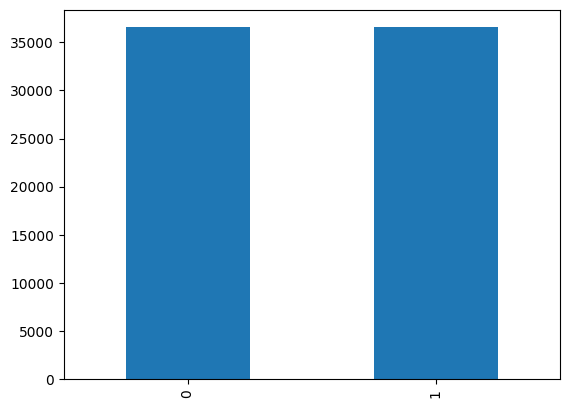

In [ ]:
# View balanced data columns
y_balanced = pd.Series(y_balanced)
y_balanced.value_counts().plot(kind="bar")

In [ ]:
from sklearn.model_selection import train_test_split

# Seperating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, stratify=y_balanced)

In [ ]:
# Checking training and testing count for target varaible
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)
print(y_train.value_counts())
print(y_test.value_counts())

1    25576
0    25575
Name: count, dtype: int64
0    10962
1    10961
Name: count, dtype: int64


In [ ]:
# To see the training and testing data
X_train.shape, X_test.shape

((51151, 14), (21923, 14))

Random Forest Classifier

Random Forest Classifier:
Training Accuracy: 0.977
Testing Accuracy: 0.920

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     10962
           1       0.94      0.90      0.92     10961

    accuracy                           0.92     21923
   macro avg       0.92      0.92      0.92     21923
weighted avg       0.92      0.92      0.92     21923



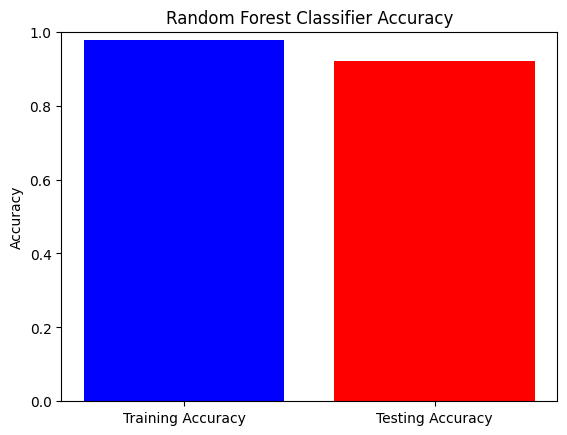


ROC-AUC Score: 0.970



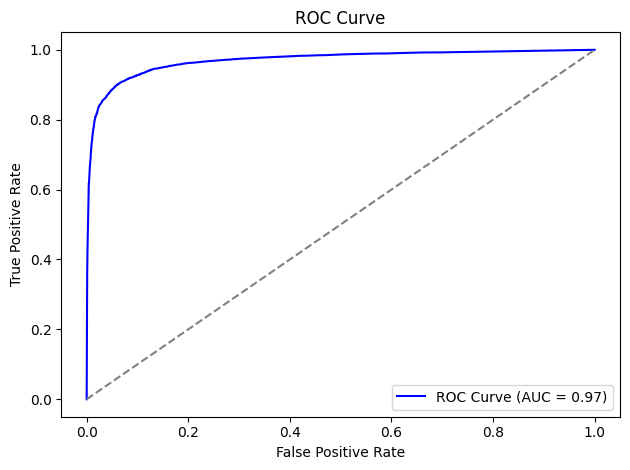

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# Initialize Random Forest Classifier
randomforest_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced", )

# Fit the model
randomforest_model.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = randomforest_model.predict(X_train)
y_test_pred = randomforest_model.predict(X_test)
y_test_prob_rf = randomforest_model.predict_proba(X_test)[:, 1]

# Evaluate training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate ROC-AUC score
RF_ROC = roc_auc_score(y_test, y_test_prob_rf)

# Print evaluation metrics
print("Random Forest Classifier:")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Testing Accuracy: {test_accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


# Plotting Accuracy Comparison
plt.bar(["Training Accuracy", "Testing Accuracy"], [train_accuracy, test_accuracy], color=["blue", "red"])
plt.title("Random Forest Classifier Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

print(f"\nROC-AUC Score: {RF_ROC:.3f}\n")

# Plotting ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, randomforest_model.predict_proba(X_test)[:, 1])
plt.plot(rf_fpr, rf_tpr, color='blue', label=f"ROC Curve (AUC = {RF_ROC:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.tight_layout()
plt.show()


Neural Network

Epoch 1/100
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7210 - loss: 0.5584 - val_accuracy: 0.7430 - val_loss: 0.5278
Epoch 2/100
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7359 - loss: 0.5370 - val_accuracy: 0.7477 - val_loss: 0.5206
Epoch 3/100
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7429 - loss: 0.5245 - val_accuracy: 0.7520 - val_loss: 0.5092
Epoch 4/100
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7506 - loss: 0.5148 - val_accuracy: 0.7587 - val_loss: 0.4995
Epoch 5/100
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7540 - loss: 0.5068 - val_accuracy: 0.7654 - val_loss: 0.4946
Epoch 6/100
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7631 - loss: 0.4963 - val_accuracy: 0.7778 - val_loss: 0.4804
Epoch 7/100
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7684 - loss: 0.4908 - val_accuracy: 0.7795 - val_loss: 0.4678
Epoch 8/100
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7701 - loss:

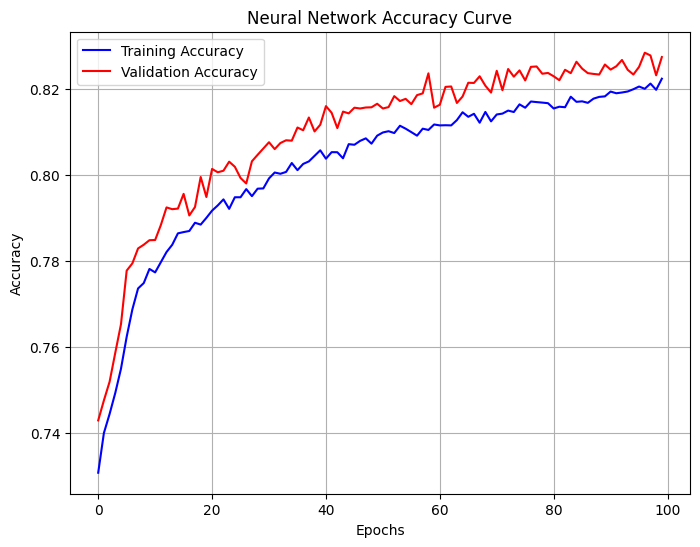


ROC-AUC Score: 0.912


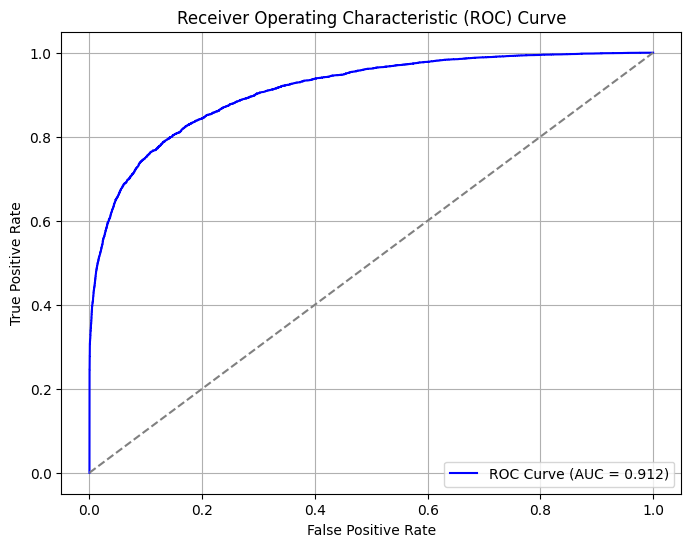

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, auc

# Define the neural network model
model = Sequential()

# Input layer
model.add(Input(shape=(X_train.shape[1],)))

# Use of 5 hidden layers and dropout to prevent overfitting
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))


# Output Layer with Sigmoid for binary classification
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
NN_model = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

# Evaluate training and testing performance
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("\nNeural Network Model Evaluation:")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Testing Accuracy: {test_accuracy:.3f}")

# Predict probabilities and classes
y_test_pred_probs = model.predict(X_test, verbose=0).ravel()
y_test_pred_classes = (y_test_pred_probs >= 0.5).astype(int)


print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_classes))

# Plot the curve
plt.figure(figsize=(8, 6))

# Plot training and validation accuracy
plt.plot(NN_model.history["accuracy"], label="Training Accuracy", color="blue")
plt.plot(NN_model.history["val_accuracy"], label="Validation Accuracy", color="red")

plt.title("Neural Network Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# Calculate and print ROC-AUC and classification report
NN_ROC = roc_auc_score(y_test, y_test_pred_probs)
print(f"\nROC-AUC Score: {NN_ROC:.3f}\n")

nn_fpr, nn_tpr, thresholds = roc_curve(y_test, y_test_pred_probs)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(nn_fpr, nn_tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(nn_fpr, nn_tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()








Comparison


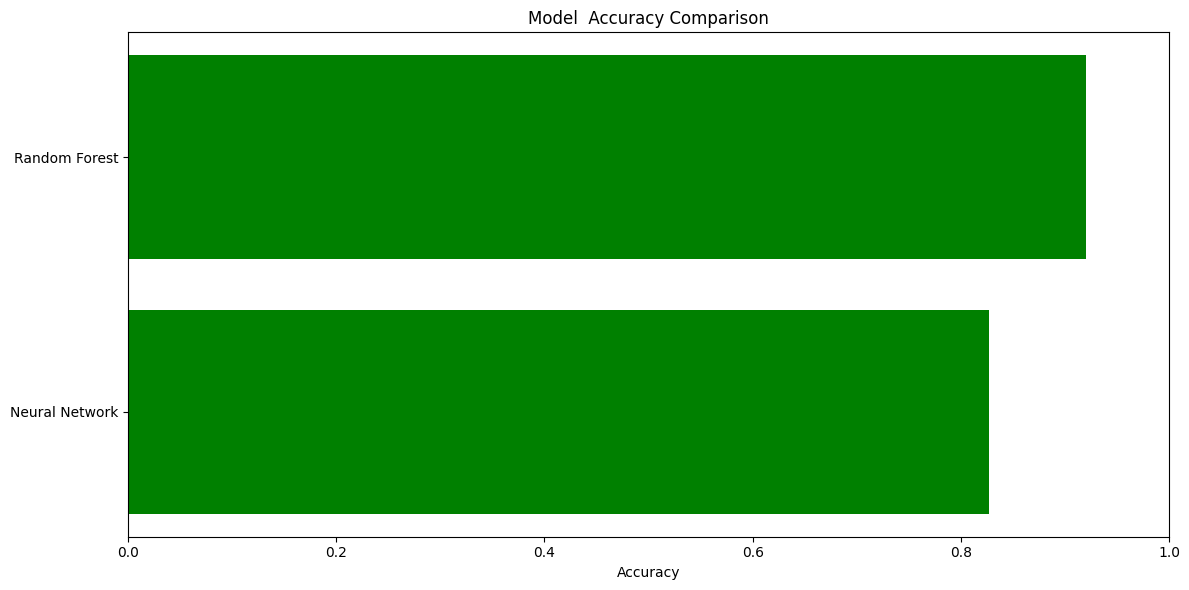


Random Forest Accuracy: 0.920
Neural Network Accuracy: 0.83



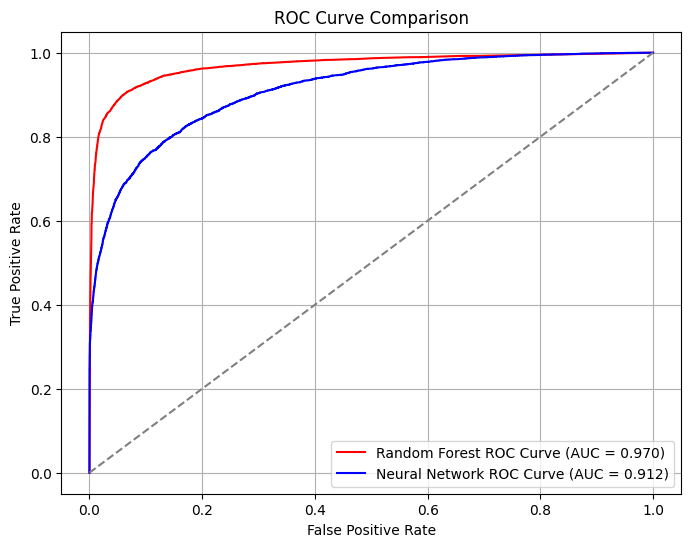

In [ ]:
# Initialize lists to store metrics for each model
model_names = []
accuracies = []
roc_aucs = []

# Function to store metrics
def store_metrics(model_name, accuracy, roc_auc):
    model_names.append(model_name)
    accuracies.append(accuracy)
    roc_aucs.append(roc_auc)


# Store details of models
store_metrics("Neural Network", test_accuracy, NN_ROC)
store_metrics("Random Forest", accuracy_score(y_test, y_test_pred), RF_ROC)

# Plot comparison of accuracies
plt.figure(figsize=(12, 6))

# Accuracy comparison
plt.barh(model_names, accuracies, color='green')
plt.xlabel("Accuracy")
plt.title("Model  Accuracy Comparison")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

print(f"\nRandom Forest Accuracy: {accuracy_score(y_test, y_test_pred):.3f}")
print(f"Neural Network Accuracy: {test_accuracy:.2f}\n")

# Plot ROC curves for both models
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color="red", label=f"Random Forest ROC Curve (AUC = {RF_ROC:.3f})")
plt.plot(nn_fpr, nn_tpr, color="blue", label=f"Neural Network ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()
